# Data Loading

In [ ]:
%%writefile kaggle.json
{"username":"rushikeshdarge","key":"b0c2c70fd44c3c4e4ccdae422c7291ed"}

Writing kaggle.json


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rushikeshdarge/case-study-2-dataset
!unzip /content/case-study-2-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CS2_dataset/SFW/SFW55.jpg  
  inflating: CS2_dataset/SFW/SFW550.jpg  
  inflating: CS2_dataset/SFW/SFW5500.jpg  
  inflating: CS2_dataset/SFW/SFW5501.jpg  
  inflating: CS2_dataset/SFW/SFW5502.jpg  
  inflating: CS2_dataset/SFW/SFW5503.jpg  
  inflating: CS2_dataset/SFW/SFW5504.jpg  
  inflating: CS2_dataset/SFW/SFW5505.jpg  
  inflating: CS2_dataset/SFW/SFW5506.jpg  
  inflating: CS2_dataset/SFW/SFW5507.jpg  
  inflating: CS2_dataset/SFW/SFW5508.jpg  
  inflating: CS2_dataset/SFW/SFW5509.jpg  
  inflating: CS2_dataset/SFW/SFW551.jpg  
  inflating: CS2_dataset/SFW/SFW5510.jpg  
  inflating: CS2_dataset/SFW/SFW5511.jpg  
  inflating: CS2_dataset/SFW/SFW5512.jpg  
  inflating: CS2_dataset/SFW/SFW5513.jpg  
  inflating: CS2_dataset/SFW/SFW5514.jpg  
  inflating: CS2_dataset/SFW/SFW5515.jpg  
  inflating: CS2_dataset/SFW/SFW5516.jpg  
  inflating: CS2_dataset/SFW/SFW5517.jpg  
  inflating: CS2_dataset/SFW/SFW5518.jpg  
  infla

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import os
import cv2
import shutil
import random
import glob
import warnings
import tensorflow as tf
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# https://tutorialspoint4all.com/python-program-to-convert-bytes-to-kilobytes-megabytes-gigabytes-and-terabytes/
def convert_bytes(bytes_number):
    tags = [ "Byte", "Kilobyte", "Megabyte", "Gigabyte", "Terabyte" ]
 
    i = 0
    double_bytes = bytes_number
 
    while (i < len(tags) and  bytes_number >= 1024):
            double_bytes = bytes_number / 1024.0
            i = i + 1
            bytes_number = bytes_number / 1024
 
    return str(round(double_bytes, 2)) + " " + tags[i]

In [ ]:
# in neural network model.predict give little different output
# to check performance of Neural network
def performace_of_model_nn(model, history, y_train, X_train, y_test,X_test):
    # to check the performance of neural network model
    # predict using model
    y_train_pred = np.where(model.predict(X_train)[:,1] > 0.5, 1,0)
    y_test_pred = np.where(model.predict(X_test)[:,1] > 0.5, 1,0)

    y_train = np.argmax(y_train, axis=1)
    # print(y_train_pred)
    # printing classification report
    target_names = ['class 0', 'class 1']
    print('Classification report for train data is : \n')
    print(classification_report(y_train, y_train_pred, target_names=target_names))


    print('Classification report for test data is : \n')
    print(classification_report(y_test,y_test_pred, target_names=target_names))


    # creating confusion matrix
    cf_train = confusion_matrix(y_train,y_train_pred)
    cf_test = confusion_matrix(y_test,y_test_pred)
    cf_ideal = confusion_matrix(y_test,y_test)

    # heatmap of confusion matrix on train data
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    sns.heatmap(cf_train/np.sum(cf_train), annot=True, fmt=".2%", cmap='YlGnBu')
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Train Confusion matrix")

    # heatmap of confusion matrix on test data
    plt.subplot(1,2,2)
    sns.heatmap(cf_test/np.sum(cf_test), annot=True, fmt=".2%", cmap='YlGnBu')
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Test Confusion matrix")
    plt.show()

    # plotting accuracy
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

    # plotting loss 
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
ndf = pd.read_csv('/content/dataset.csv')
ndf.head()
kdf = ndf.sample(10000)
train_d, test_d = train_test_split(kdf, test_size=0.20, random_state=42, stratify=kdf['label'])

## images to array

In [ ]:
# training_Data
img_size = 224

all_images_train = []
ex_y_train = []

n_img_temp = train_d[:2000]
for i in tqdm(range(len(n_img_temp['path']))):
    try:
        img = cv2.imread(n_img_temp.iloc[i]['path'])
        new_img = cv2.resize(img/255, (img_size, img_size))
        all_images_train.append(new_img)
        ex_y_train.append(int(n_img_temp.iloc[i]['label']))
    except:
        continue
ex_x_train = np.array(all_images_train)
ex_y_train = tf.keras.utils.to_categorical(ex_y_train, 2)

100%|██████████| 2000/2000 [00:07<00:00, 262.27it/s]


In [ ]:
all_images_test = []
ex_y_test = []

n_img_temp = test_d[:300]
for i in tqdm(range(len(n_img_temp['path']))):
    try:
        img = cv2.imread(n_img_temp.iloc[i]['path'])
        new_img = cv2.resize(img/255, (img_size, img_size))
        all_images_test.append(new_img)
        ex_y_test.append(int(n_img_temp.iloc[i]['label']))
    except:
        continue
ex_x_test = np.array(all_images_test)

100%|██████████| 300/300 [00:02<00:00, 124.74it/s]


# MobieNet V2

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, DepthwiseConv2D, ReLU, Conv2D, Flatten, AvgPool2D, BatchNormalization, add, Input, GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.nn import relu6

The main reason of small size Mobilenet is depth-wise convolution layer. In depth-wise convolution, we use each filter channel only at one input channel. In the example, we have 3 channel filter and 3 channel image. What we do is — break the filter and image into three different channels and then convolve the corresponding image with corresponding channel and then stack them back.

It require less computation and because of less computation less time.

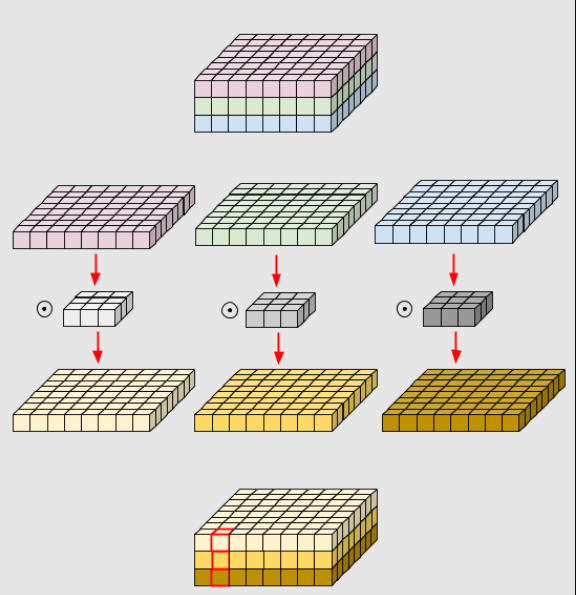

In [ ]:
def expansion_block(x, t, filter):
    total_filter = t * filter
    x = Conv2D(total_filter, 1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = relu6(x)
    return x

def depth_block(x, stride):
    x = DepthwiseConv2D(kernel_size=3, strides=stride, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = relu6(x)
    return x

def projection_block(x, out_channels):
    x = Conv2D(filters=out_channels, kernel_size=1, padding='same')(x)
    x = BatchNormalization()(x)
    return x

![img](https://miro.medium.com/max/1198/1*KeSmxGxWaJCPucirlXsrVw.png)

In [ ]:
# Bottleneck
def bottleneck(x, t, filter, stride, out_channels):
    y = expansion_block(x, t, filter)
    y = depth_block(y, stride)
    y = projection_block(y, out_channels)
    if y.shape[-1] == x.shape[-1]:
        y = add([x,y])
    return y

![arch v2](https://miro.medium.com/max/1016/1*5iA55983nBMlQn9f6ICxKg.png)

In [ ]:
def mobilenetv2(input_image=(224,224,3), n_classes=2):
    input = Input(input_image)

    x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', use_bias=False)(input)
    x = BatchNormalization()(x)
    x = relu6(x)

    x = depth_block(x,stride=1)
    x = projection_block(x, out_channels=16)

    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=2, out_channels=24)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=24)

    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=2, out_channels=32)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=32)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=32)

    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=2, out_channels=64)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=64)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=64)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=64)

    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=96)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=96)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=96)

    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=2, out_channels=160)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=160)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=160)

    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=320)

    # 1*1 Conv
    x = Conv2D(filters=1280, kernel_size=1, strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = relu6(x)

    # avg pool
    x = GlobalAveragePooling2D()(x)
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)
    return model

In [ ]:
n_classes = 2
input_shape = (224,224,3)

model = mobilenetv2(input_shape,n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# compile model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

history = model.fit(ex_x_train, ex_y_train, batch_size=40, epochs=20, verbose=1,\
                    validation_split=0.20, callbacks=[early_stop])

Epoch 1/20
40/40 [==============================] - 17s 306ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 1.9450 - val_accuracy: 0.8425
Epoch 2/20
40/40 [==============================] - 11s 280ms/step - loss: 0.0846 - accuracy: 0.9725 - val_loss: 4.6012 - val_accuracy: 0.7075
Epoch 3/20
40/40 [==============================] - 11s 278ms/step - loss: 0.0646 - accuracy: 0.9737 - val_loss: 1.5284 - val_accuracy: 0.8500
Epoch 4/20
40/40 [==============================] - 11s 272ms/step - loss: 0.0300 - accuracy: 0.9875 - val_loss: 1.0023 - val_accuracy: 0.8625
Epoch 5/20
40/40 [==============================] - 11s 268ms/step - loss: 0.0603 - accuracy: 0.9825 - val_loss: 1.1903 - val_accuracy: 0.8600
Epoch 6/20
40/40 [==============================] - 11s 271ms/step - loss: 0.0586 - accuracy: 0.9756 - val_loss: 1.4407 - val_accuracy: 0.8775
Epoch 7/20
40/40 [==============================] - 11s 275ms/step - loss: 0.0585 - accuracy: 0.9769 - val_loss: 4.3464 - val_accuracy: 0.7200

Classification report for train data is : 

              precision    recall  f1-score   support

     class 0       0.99      0.84      0.91       945
     class 1       0.88      0.99      0.93      1055

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000

Classification report for test data is : 

              precision    recall  f1-score   support

     class 0       0.98      0.65      0.78       139
     class 1       0.77      0.99      0.86       161

    accuracy                           0.83       300
   macro avg       0.87      0.82      0.82       300
weighted avg       0.87      0.83      0.83       300



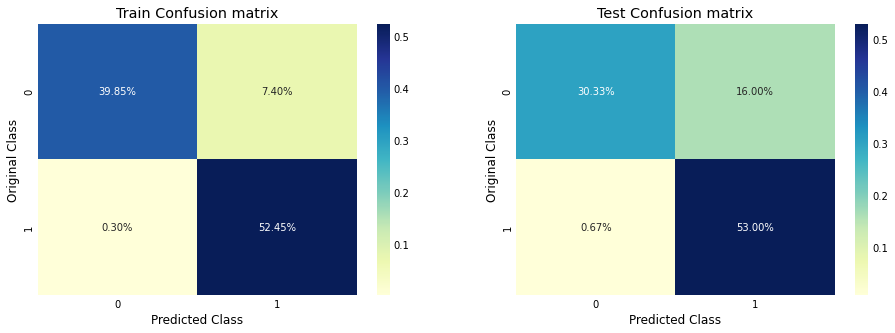

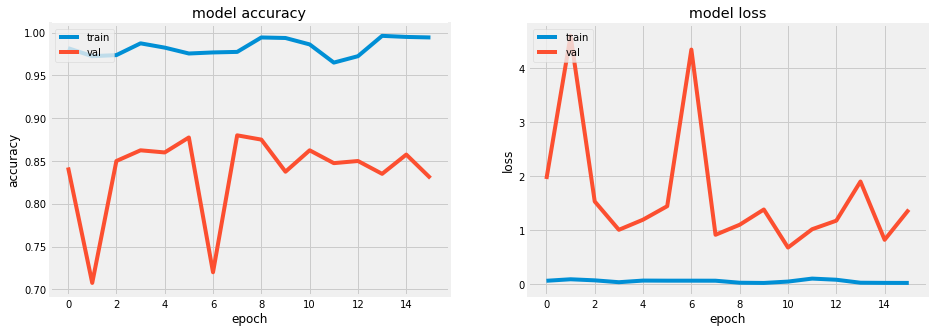

In [ ]:
performace_of_model_nn(model, history, ex_y_train, ex_x_train, ex_y_test, ex_x_test)

* This is the MobileNet model as per research paper V2.0 we get 0.92 f1-score and accuracy in training and in testing 0.83, means our model is powerful and it overfit.
* It has 2.2 Million parameters and size is 9.08 MegaByte
* Our requirement is as small as possible model we can little bit compromise on accuracy.

# Custom MobileNet2.1

In [ ]:
def mobilenetv21(input_image=(224,224,3), n_classes=2):
    input = Input(input_image)

    x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', use_bias=False)(input)
    x = BatchNormalization()(x)
    x = relu6(x)

    x = depth_block(x,stride=1)
    x = projection_block(x, out_channels=16)

    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=2, out_channels=24)
    x = bottleneck(x=x, t=6, filter=x.shape[-1], stride=1, out_channels=24)

    # 1*1 Conv
    x = Conv2D(filters=64, kernel_size=1, strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = relu6(x)

    # avg pool
    x = GlobalAveragePooling2D()(x)
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)
    return model

In [ ]:
n_classes = 2
input_shape = (224,224,3)

model = mobilenetv21(input_shape,n_classes)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_35 (Conv2D)             (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_52 (BatchN  (None, 112, 112, 32  128        ['conv2d_35[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# # # np.save('ex_y_train',ex_y_train)
# # # np.save('ex_x_train',ex_x_train)
# # # np.save('ex_y_test',ex_y_test)
# # # np.save('ex_x_test',ex_x_test)

# ex_y_train = np.load('ex_y_train.npy')
# ex_x_train = np.load('ex_x_train.npy')
# ex_y_test = np.load('ex_y_test.npy')
# ex_x_test = np.load('ex_x_test.npy')

In [ ]:
# compile model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

history = model.fit(ex_x_train, ex_y_train, batch_size=20, epochs=14, verbose=1,\
                    validation_split=0.20, callbacks=[early_stop])

Epoch 1/14
80/80 [==============================] - 23s 96ms/step - loss: 0.4862 - accuracy: 0.7856 - val_loss: 0.7142 - val_accuracy: 0.4525
Epoch 2/14
80/80 [==============================] - 7s 86ms/step - loss: 0.4062 - accuracy: 0.8313 - val_loss: 0.7798 - val_accuracy: 0.4525
Epoch 3/14
80/80 [==============================] - 7s 86ms/step - loss: 0.3540 - accuracy: 0.8631 - val_loss: 0.7502 - val_accuracy: 0.4525
Epoch 4/14
80/80 [==============================] - 7s 87ms/step - loss: 0.3251 - accuracy: 0.8694 - val_loss: 0.6749 - val_accuracy: 0.5725
Epoch 5/14
80/80 [==============================] - 7s 87ms/step - loss: 0.2997 - accuracy: 0.8737 - val_loss: 0.9524 - val_accuracy: 0.4625
Epoch 6/14
80/80 [==============================] - 7s 87ms/step - loss: 0.2826 - accuracy: 0.8950 - val_loss: 0.4004 - val_accuracy: 0.8225
Epoch 7/14
80/80 [==============================] - 7s 87ms/step - loss: 0.2729 - accuracy: 0.8931 - val_loss: 0.7318 - val_accuracy: 0.5950
Epoch 8/14
8

Classification report for train data is : 

              precision    recall  f1-score   support

     class 0       0.86      0.82      0.84       960
     class 1       0.84      0.88      0.86      1040

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Classification report for test data is : 

              precision    recall  f1-score   support

     class 0       0.86      0.81      0.83       139
     class 1       0.84      0.89      0.86       161

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



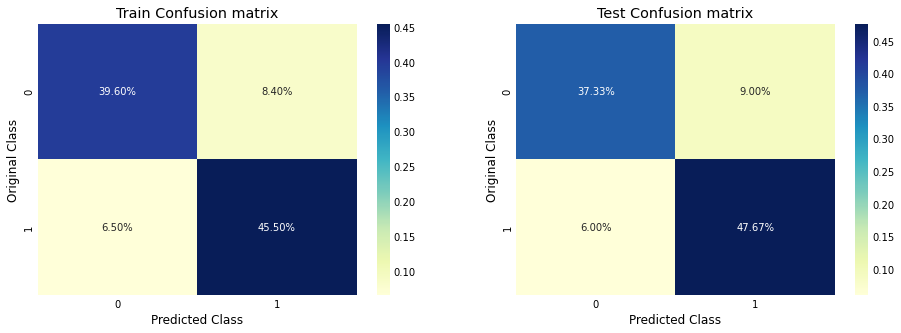

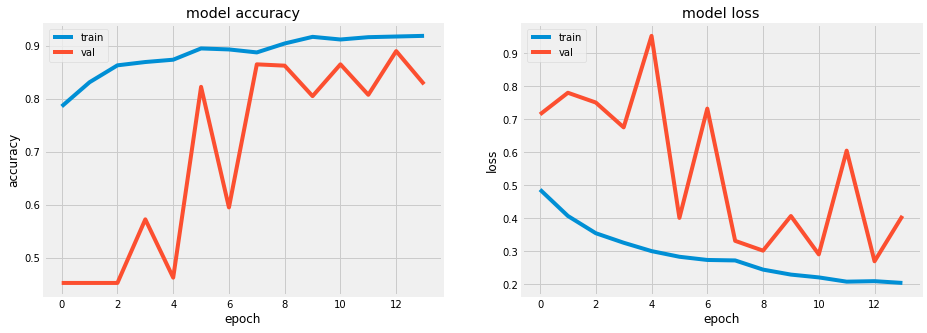

In [ ]:
performace_of_model_nn(model, history, ex_y_train, ex_x_train, ex_y_test, ex_x_test)

In [ ]:
model.save('MN21.h5')
convert_bytes(os.path.getsize('MN21.h5'))

'399.45 Kilobyte'

In [ ]:
# model = tf.keras.models.load_model('MN21.h5')

# LIME
LIME, or Local Interpretable Model-Agnostic Explanations, is an algorithm that can explain the predictions of any classifier or regressor in a faithful way, by approximating it locally with an interpretable model.

In [ ]:
!pip install lime

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

In [ ]:
# downloading image from internet
import urllib.request
add = 'https://static.timesofisrael.com/www/uploads/2021/11/fd7789ce-4667-457b-b5f2-6223d399a60b-1-1024x640.jpg'
urllib.request.urlretrieve(add, "00000001.jpg")

('00000001.jpg', <http.client.HTTPMessage at 0x7f75e71a4ed0>)

Predicted class  0


  0%|          | 0/1000 [00:00<?, ?it/s]

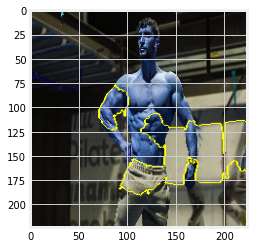

In [ ]:
temp = cv2.imread('/content/00000001.jpg')
new_img = cv2.resize(temp/255, (224, 224))
model.predict(new_img.reshape((1,224,224,3))).argmax(axis=1)[0]

print('Predicted class ',model.predict(new_img.reshape((1,224,224,3))).argmax(axis=1)[0])

explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         new_img, 
         model.predict
)
plt.imshow(new_img)
image, mask = explanation.get_image_and_mask(
         model.predict(
              new_img.reshape((1,224,224,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

Actual class  [1. 0.]
Predicted class  0


  0%|          | 0/1000 [00:00<?, ?it/s]

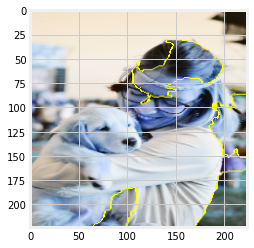

In [ ]:
image_number = 8
print('Actual class ',ex_y_train[image_number])
print('Predicted class ',model.predict(ex_x_train[image_number].reshape((1,224,224,3))).argmax(axis=1)[0])

explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         ex_x_train[image_number], 
         model.predict
)
plt.imshow(ex_x_train[image_number])
image, mask = explanation.get_image_and_mask(
         model.predict(
              ex_x_train[image_number].reshape((1,224,224,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

In [ ]:
image_number = 5
print('Actual class ',ex_y_train[image_number])
print('Predicted class ',model.predict(ex_x_train[image_number].reshape((1,224,224,3))).argmax(axis=1)[0])

explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         ex_x_train[image_number], 
         model.predict
)
plt.imshow(ex_x_train[image_number])
image, mask = explanation.get_image_and_mask(
         model.predict(
              ex_x_train[image_number].reshape((1,224,224,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

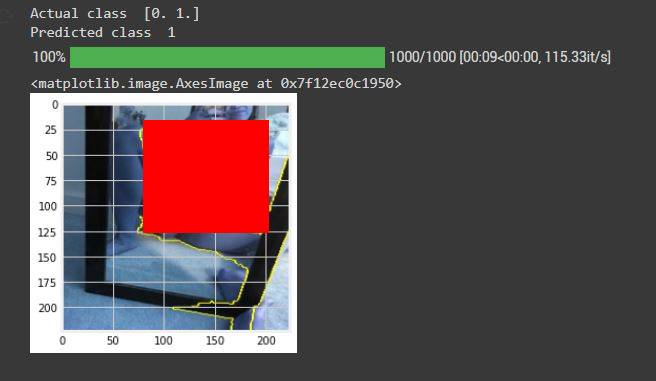

In [ ]:
%%timeit
model.predict(new_img.reshape((1,224,224,3))).argmax(axis=1)[0]

10 loops, best of 5: 37.5 ms per loop


* After using explanibility of model our model shows correct part which make that image NSFW or SFW.
* Our model performance is very good.
* also accuracy latency reduce from 42ms to 37.5 ms

# Model Compression

We are going to deploy our model in chrome extension. There are 2 ways to do that 

1) TFLite

2) TF.js

* TFLite is new for edge device and it is still underdevelopment.
* TF.js we can deploy in extension.

Lets save both model and experiment with both of them in browser

## TFLite
TensorFlow Lite is a mobile library for deploying models on mobile, microcontrollers and other edge devices.

In [ ]:
# https://github.com/bhattbhavesh91/tflite-tutorials/blob/master/tflite-part-2.ipynb
TF_LITE_MODEL_FILE_NAME = "MNv21.tflite"

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
tflite_model = tf_lite_converter.convert()

tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpjkbcnrvf/assets


INFO:tensorflow:Assets written to: /tmp/tmpjkbcnrvf/assets


44096

In [ ]:
print('Size of TFLite model is',convert_bytes(os.path.getsize('MNv21.tflite')))

Size of TFLite model is 43.06 Kilobyte


## TF.js
TensorFlow.js is a JavaScript library for training and deploying models in the browser and on Node.js.

In [ ]:
!pip install tensorflowjs 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 40 kB 6.1 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model, 'models')

In [ ]:
# Convert the model
!mkdir tfjs_model
!tensorflowjs_converter --input_format keras MN21.h5 tfjs_model/

In [ ]:
!zip -r tfjs_model.zip model

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 90%)


In [ ]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model MN21.h5 model/

2022-06-12 07:01:29.650798: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-06-12 07:01:31.034421: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Writing weight file model/model.json...


In [ ]:
print('Size of TFjs model is',convert_bytes(os.path.getsize('tfjs_model.zip')))

Size of TFjs model is 71.52 Kilobyte


# Testing

In [ ]:
model = tf.keras.models.load_model('MN21.h5')

In [ ]:
add_img = '/content/CS2_dataset/SFW/SFW10000.jpg'
img = cv2.imread(add_img)
new_img = cv2.resize(img/255, (224, 224))
new_img = np.reshape(new_img, (1,224,224,3))
np.argmax(model.predict(new_img))

0

In [ ]:
np.reshape()